# Check and make figure for stability analysis 
At the beginning, you have to run following code to get individual target speed results:
```sh
#!/bin/bash

for target in $(seq 0.5 0.1 3.0); do
    python3.10 simulate_and_make_data.py --mode=one-target --target=$target
done
```



## Import module

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys, os
sys.path.append(os.path.join(os.getcwd(), '../'))
from src.config import *

plt.rcParams['font.family'] = 'Times New Roman'
data_folder = str(os.getcwd())+"/../data"

## Plot and save figure with poincare section

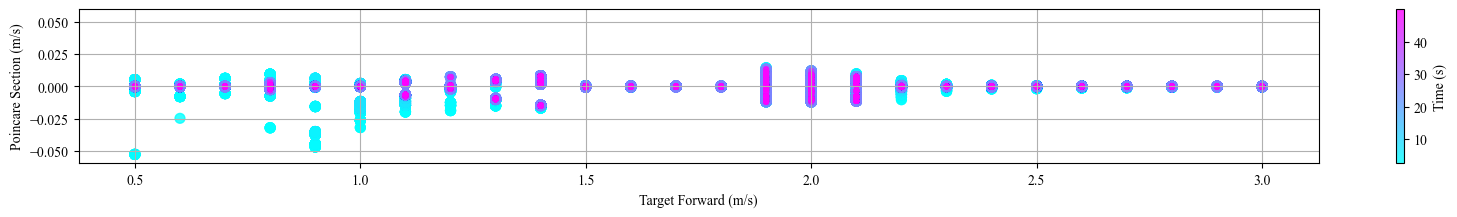

In [11]:
fig, ax = plt.subplots(figsize=(20, 2))
cmap = plt.get_cmap('plasma') 
for value in np.arange(0.5, 3.1, 0.1):
    filename = f"target_dx_{value:.1f}.csv"
    file_path = os.path.join(str(data_folder), filename)
    data = np.genfromtxt(file_path, delimiter=",")
    data = data.T
    start = 1000
    end = -1
    time = data[0][start:end:10]
    x = data[3][start:end:10]
    y = data[32][start:end:10]
    sizes = np.where(time < (time.min() + time.max()) / 2, 50, 10)      
    color = cmap((value - 0.5) / 2.5) 
    sc = ax.scatter(x, y, c=time, cmap='cool', s=sizes, alpha=0.8, label=f'{value:.1f}', vmin=min(time), vmax=max(time))
    
plt.xlabel('Target Forward (m/s)')
plt.ylabel('Poincare Section (m/s)')
plt.ylim(-0.06, 0.06)
cbar = plt.colorbar(sc)
cbar.set_label('Time (s)')
plt.grid()
plt.show()